In [2]:
import numpy as np
import os
import pickle
np.set_printoptions(suppress=True, threshold=np.inf, linewidth=500, precision=2)

pkls = list(filter(lambda s: s.endswith(".pkl"), os.listdir("./datasets")))

slice = 0
print(pkls)
pkl = 'jelly_290.pkl'
print(f"Loading: ./datasets/{pkl}")
ds = pickle.load(open(f"./datasets/{pkl}", "rb"))

['jelly_130.pkl', 'jelly_110.pkl', 'jelly_150.pkl', 'jelly_260.pkl', 'jelly_140.pkl', 'jelly_160.pkl', 'jelly_90.pkl', 'jelly_180.pkl', 'jelly_170.pkl', 'jelly_20.pkl', 'jelly_120.pkl', 'jelly_280.pkl', 'jelly_300.pkl', 'jelly_80.pkl', 'jelly_70.pkl', 'jelly_290.pkl', 'jelly_230.pkl', 'jelly_190.pkl', 'jelly_250.pkl', 'jelly_50.pkl', 'jelly_240.pkl', 'jelly_100.pkl', 'jelly_60.pkl', 'jelly_210.pkl', 'jelly_40.pkl', 'jelly_220.pkl', 'jelly_200.pkl', 'jelly_30.pkl', 'jelly_270.pkl']
Loading: ./datasets/jelly_290.pkl


In [3]:
step = 2500
x = ds[step].x

xv = x[0, :, :]
yv = x[1, :, :]
xv.shape, yv.shape

((64, 64), (64, 64))

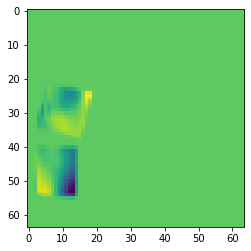

In [2]:
import matplotlib.pyplot as plt

plt.imshow(xv, interpolation='none')

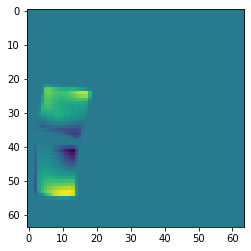

In [3]:
plt.imshow(yv, interpolation='none')

In [4]:
y = ds[step].y


xvy = y[0, :, :]
yvy = y[1, :, :]

NameError: name 'ds' is not defined

In [5]:
plt.imshow(xvy, interpolation='none')

NameError: name 'xvy' is not defined

In [6]:
plt.imshow(yvy, interpolation='none')

NameError: name 'yvy' is not defined

In [1]:
from tensorflow.keras.models import Model, load_model

m = load_model("./nn/saved_models/cnn_model.h5")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

for step in range(3000):
    x = np.load(f"datasets/jelly_200/{step}/igs.npy")
    y = np.load(f"datasets/jelly_200/{step}/gbc.npy")

    xv = x[:, :, 0]
    yv = x[:, :, 1]
    mask_ground_truth = (x[:, :, 0] != 0) | (x[:, :, 1] != 0)

    model_input = np.moveaxis(np.stack((xv, yv, mask_ground_truth)), 0, -1)
    result = np.squeeze(m.predict(np.expand_dims(model_input, axis=0)))
    xv = result[:, :, 0]
    yv = result[:, :, 1]
    mask = result[:, :, 2]

    if os.path.exists("pics") and step % 10 == 0:
        plt.imsave(f"pics/mask_ground_truth/mask_{step}.png", mask)
        plt.imsave(f"pics/mask/mask_{step}.png", mask)
        plt.imsave(f"pics/x/x_{step}.png", xv)
        plt.imsave(f"pics/y/y_{step}.png", yv)


In [21]:
result = np.squeeze(m.predict(np.expand_dims(model_input, axis=0)))
xv = result[:, :, 0]
yv = result[:, :, 1]
np.concatenate((np.expand_dims(xv, axis=2), np.expand_dims(yv, axis=2)), axis=2).shape

(64, 64, 2)

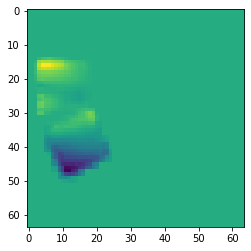

In [22]:
plt.imshow(yv)

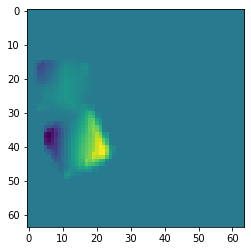

In [23]:
plt.imshow(xv)